# Function plots for lecture notes

In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import math

plt.style.use("lecture.mplstyle")


## Gini and entropy

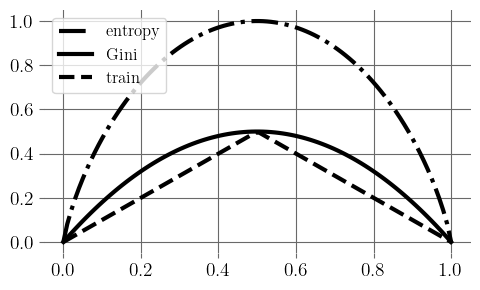

In [9]:
x=np.linspace(0,1,num=100)

def train(p):
    return 1-max(p,1-p)

def gini(p):
    return 2*p*(1-p)

def info(p):
    if p==0: return 0
    if p==1: return 0
    return -p*math.log(p,2)-(1-p)*math.log(1-p,2)

plt.figure(figsize=(5,3))
plt.plot(x,[info(p) for p in x], 'k-.',label='entropy')
plt.plot(x,[gini(p) for p in x], 'k-',label='Gini')
plt.plot(x,[train(p) for p in x],'k--',label='train')
plt.legend(loc="upper left", fontsize=12)
plt.box(False)
plt.tight_layout()
plt.savefig("gini.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

## Activation functions

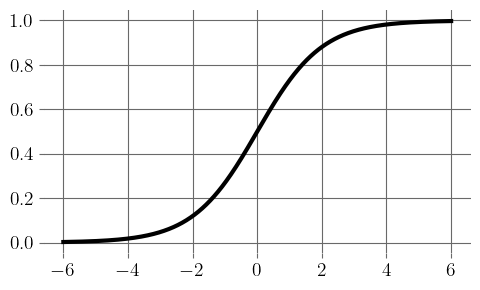

In [3]:
def logis(z):
#    return 1/(1+math.exp(-z))
    return 1/(1+np.exp(-z))

x=np.linspace(-6,6,num=1000)

plt.figure(figsize=(5,3))
#plt.plot(x,[logis(z) for z in x],'k-',linewidth=3)
#plt.plot(x,logis(x),'k-',linewidth=3)
plt.plot(x,logis(x),'k-')
#plt.title("logistic function")
plt.box(False)
plt.tight_layout()
plt.savefig("logistic.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

Text(0.5, 1.0, 'tanh')

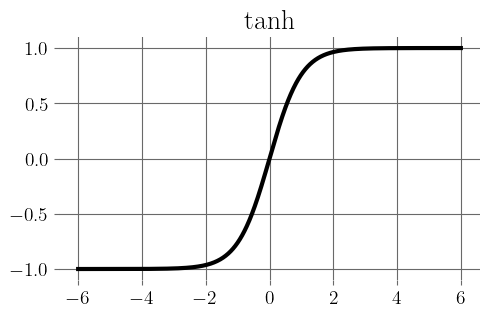

In [4]:
x=np.linspace(-6,6,num=1000)

plt.figure(figsize=(5,3))
plt.grid(True)
plt.plot(x,[math.tanh(z) for z in x],'k-',linewidth=3)
plt.tight_layout()
plt.title("logistic function",fontsize=12)
plt.box(False)

plt.title("tanh")

Text(0.5, 1.0, 'ReLU')

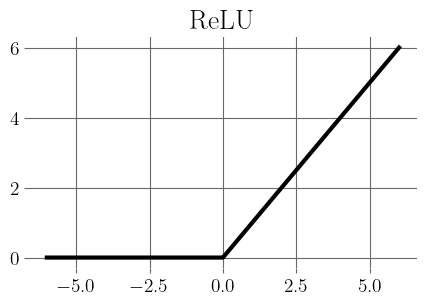

In [5]:
x=np.linspace(-6,6,num=1000)
plt.figure(figsize=(5,3))
plt.grid(True)
plt.plot(x,[max(z,0) for z in x],'k-')
plt.title("ReLU")

Text(0.5, 1.0, 'leaky ReLU')

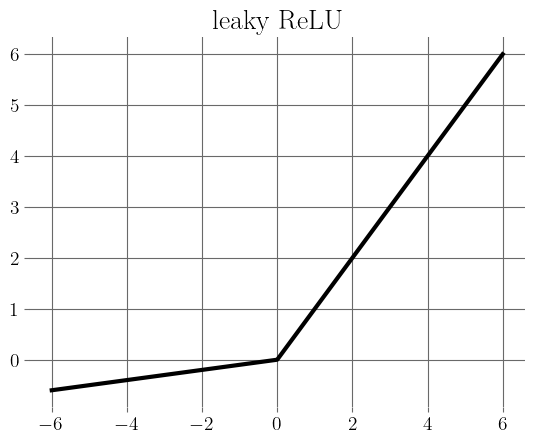

In [6]:
def leaky(x,alpha=0.1):
    return np.max([x,alpha*x],axis=0)
x=np.linspace(-6,6,num=1000)
#plt.plot(x,[max(z,0.1*z) for z in x],'b-')
plt.plot(x,leaky(x),'k-')
plt.title("leaky ReLU")

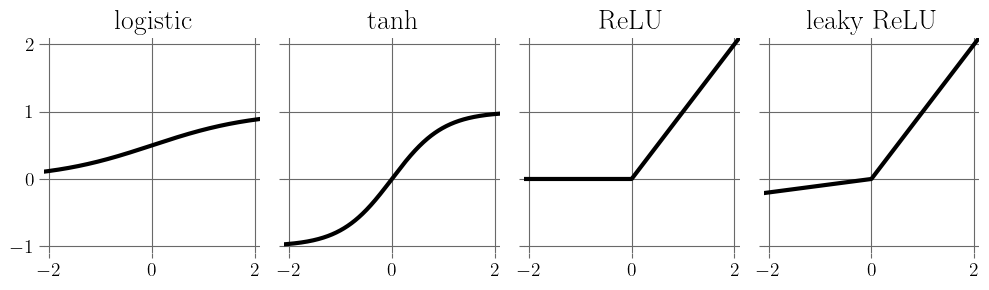

In [17]:
#plt.style.use("lecture.mplstyle")
#_,axs=plt.subplots(2,2,figsize=(6,6),sharex=True,sharey="row")
_,axs=plt.subplots(1,4,figsize=(10,3),sharex=True,sharey="row")
axs=axs.flat
x=np.linspace(-4,4,num=1000)
axs[0].plot(x,logis(x),"k-")
axs[0].set_title("logistic")
axs[0].set_ylim(-1.1,2.1)
axs[0].set_xlim(-2.1,2.1)
axs[1].plot(x,np.tanh(x),"k-")
axs[1].set_title("tanh")
axs[2].plot(x,leaky(x,alpha=0),"k-")
axs[2].set_title("ReLU")
axs[3].plot(x,leaky(x),"k-")
axs[3].set_title("leaky ReLU")
plt.tight_layout()
plt.savefig("activations.png",dpi=300)

## Losses

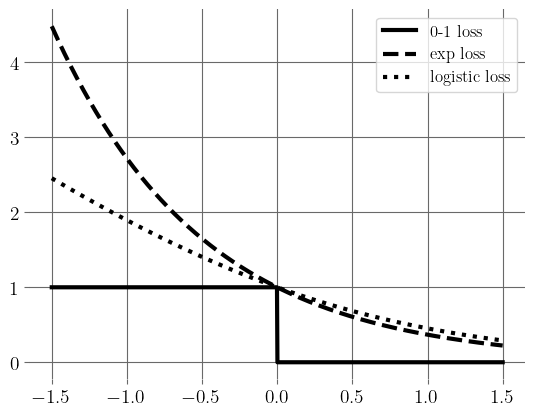

In [8]:
def zoloss(z):
    if z>=0:
        return 0
    return 1


x=np.linspace(-1.5,1.5,num=1000)
plt.plot(x,[zoloss(z) for z in x],'k-',label="0-1 loss")
plt.plot(x,[math.e**(-z) for z in x],'k--',label="exp loss")
plt.plot(x,[math.log(1+math.e**(-z),2) for z in x],'k:',label="logistic loss")
plt.legend(fontsize=12)
plt.savefig("losses.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

## Beta distribution

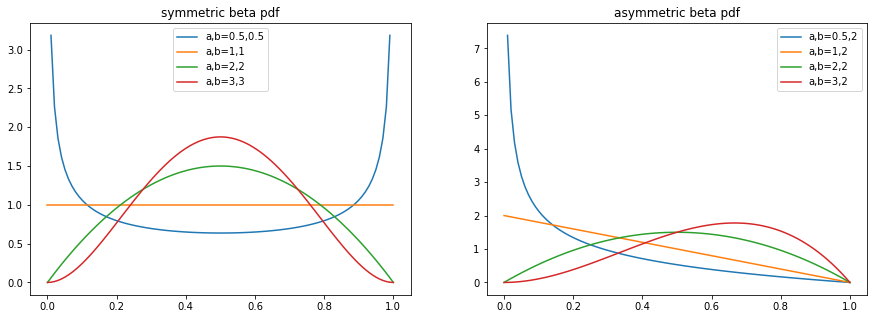

In [8]:
from scipy.stats import beta
x=np.linspace(0,1,100)
a,b=2,3
fig, axs = plt.subplots(1, 2,figsize=(15,5))
for a,b in zip([0.5,1,2,3],[0.5,1,2,3]):
    axs[0].plot(x,beta.pdf(x,a,b),label="a,b={},{}".format(a,b))
axs[0].legend()
axs[0].set_title("symmetric beta pdf")
for a,b in zip([0.5,1,2,3],[2,2,2,2]):
    axs[1].plot(x,beta.pdf(x,a,b),label="a,b={},{}".format(a,b))
axs[1].legend()
axs[1].set_title("asymmetric beta pdf")
plt.savefig("beta.png",dpi=300)
plt.show()

## sign vectors

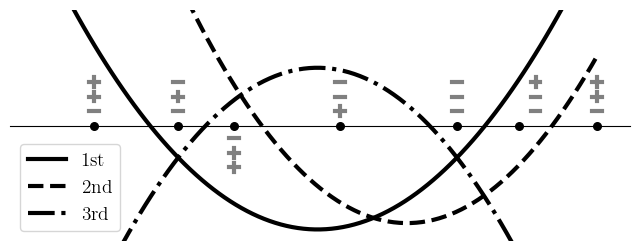

In [89]:
xx=np.linspace(-5,5,100)

y1=0.8*(xx-3)*(xx+3)
y2=1*(xx-4.2)*(xx+1)
y3=-(xx+2)*(xx-2)

factor=16
color='gray'
def draw_plus(ax,x,y):
    xmin,xmax=ax.get_xlim()
    ymin,ymax=ax.get_ylim()
    xlen=(xmax-xmin)/8/factor
    ylen=(ymax-ymin)/3/factor
    ax.plot([x-xlen,x+xlen],[y,y],color=color)
    ax.plot([x,x],[y-ylen,y+ylen],color=color)

def draw_minus(ax,x,y):
    xmin,xmax=ax.get_xlim()
    xlen=(xmax-xmin)/8/factor
    ax.plot([x-xlen,x+xlen],[y,y],color=color)

def draw_sign_vec(ax,signs,x,y):
    offset=1.3
    fun={"+":draw_plus,"-":draw_minus}
    for i,sign in enumerate(signs):
        fun[sign](ax,x,y+offset-i)
        

fig, ax = plt.subplots(figsize=(8,3))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(xx,y1,'k-',linewidth=3,label='1st')
ax.plot(xx,y2,'k--',linewidth=3,label='2nd')
ax.plot(xx,y3,'k-.',linewidth=3,label='3rd')
ax.scatter([-4,-2.5,-1.5,0.4,2.5,3.6,5],[0]*7,c='k',s=30,zorder=10)
ax.set_ylim(-8,8)
#plt.annotate("($++-$)",(-4.5,0.7),fontweight='bold')
#plt.annotate("($-+-$)",(-3,0.7),fontweight='bold')
#plt.annotate("($-++$)",(-2,-1.4),fontweight='bold')
#plt.annotate("($--+$)",(0,0.7),fontweight='bold')
#plt.annotate("($---$)",(1.9,0.7),fontweight='bold')
#plt.annotate("($+--$)",(3.2,0.7),fontweight='bold')
#plt.annotate("($++-$)",(4.5,-1.4),fontweight='bold')

height=1.7
draw_sign_vec(ax,"++-",-4,height)
draw_sign_vec(ax,"-+-",-2.5,height)
draw_sign_vec(ax,"-++",-1.5,-height-0.5)
draw_sign_vec(ax,"--+",0.4,height)
draw_sign_vec(ax,"---",2.5,height)
draw_sign_vec(ax,"+--",3.9,height)
draw_sign_vec(ax,"++-",5,height)

ax.set_xticks([])
ax.set_yticks([])
plt.legend()

plt.savefig('signs.png',dpi=300)

## convex, concave

In [36]:
def conv_fun(x):
    return (x-1)**2-1

def conc_fun(x):
    return -0.75*(x-2)**2+2

def neither_fun(x):
    return 2*(x-1)*(x-2)**2+1

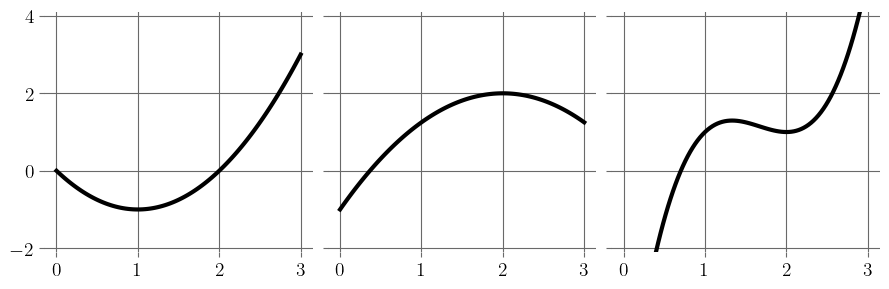

In [39]:
xx=np.linspace(0,3,100)

fig,axs=plt.subplots(1,3,figsize=(9,3),sharey=True)
for fun,ax in zip([conv_fun,conc_fun,neither_fun],axs):
    ax.plot(xx,fun(xx),'k')
    ax.set_xticks([0,1,2,3])
    ax.set_ylim(-2.1,4.1)
    #ax.set_yticks([0,1,2,3])
plt.tight_layout()
plt.savefig("convexconcave.png",dpi=300)

## Kullback-Leibler

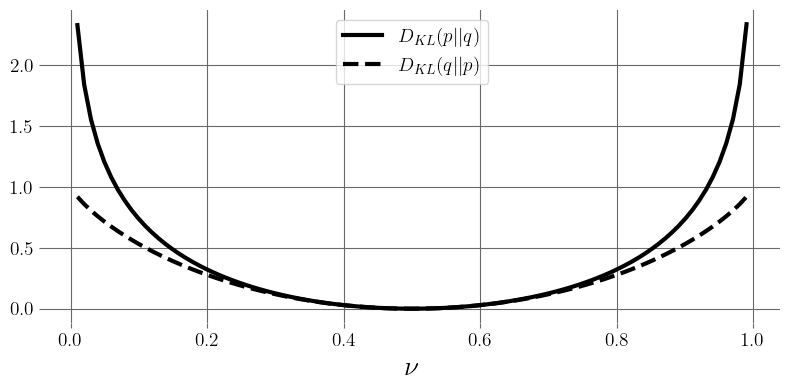

In [90]:
def KL(p,q,base=2):
    return sum([pp*math.log(pp/qq,base) for pp,qq in zip(p,q)])

def KLpq(nu,base=2):
    return -1 -0.5*math.log(nu-nu**2,base)

def KLqp(nu,base=2):
    return 1+math.log(nu**nu*(1-nu)**(1-nu),2)

NU=np.linspace(0.01,1,100,endpoint=False)
F1=[KLpq(nu) for nu in NU]
F2=[KLqp(nu) for nu in NU]


#plt.style.use("lecture.mplstyle")
fig,ax=plt.subplots(1,1,figsize=(8,4))
#ax.set_title(r"This is a title with math $\binom{n}{k}$")  ## note: raw string, as \ escapes
ax.plot(NU,F1,"k",label=r"${D}_{KL}(p||q)$")
ax.plot(NU,F2,"k--",label=r"$D_{KL}(q||p)$")
ax.set_xlabel(r"$\nu$")
#ax.set_ylabel("value")
ax.legend()
fig.tight_layout()
fig.savefig("KL.png",dpi=300)
#fig.savefig("KL.pdf",dpi=300)   ## pdf looks much better than png, height ~5cm